In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid
import sys as sys
import pickle


**Import the path file**

In [2]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs',
 '/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/cats']

In [3]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set/*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set/dogs',
 '/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set/cats']

Found 8005 images belonging to 2 classes.
Found 2033 images belonging to 2 classes.
Epoch 1/2
251/251 [==============================] - 50s 190ms/step - loss: 0.6914 - Accuracy: 0.5189
Epoch 2/2
251/251 [==============================] - 46s 182ms/step - loss: 0.6696 - Accuracy: 0.5905


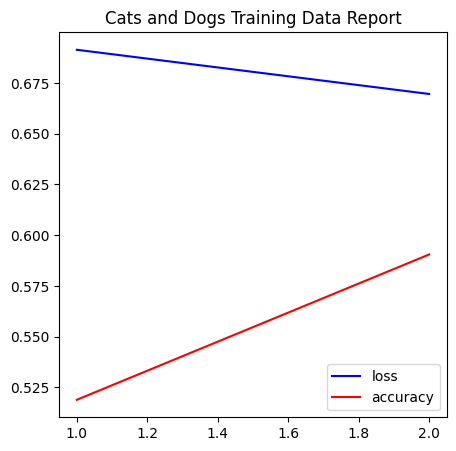

(306, 337, 3)
1/1 [==============================] - 0s 189ms/step
[[0.68463635]]
this image is Dog


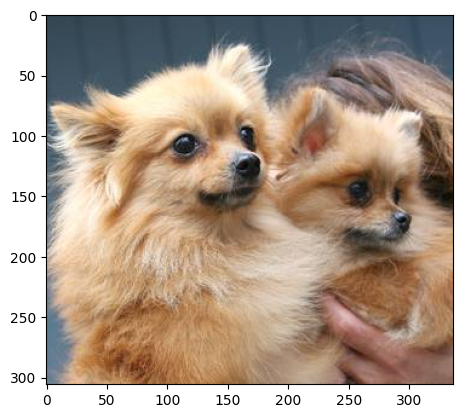

In [9]:
class CNN:
  def __init__(self):
    self.Train_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set'
    self.Test_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set'
    self.image_height,self.image_width=100,100 #Set the fixed size so while modeling images its easy to understand

  def model_predict(self,model):
    try:
      image=plt.imread('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs/dog.77.jpg')# took one image for Inferences
      plt.imshow(image)
      print(image.shape)
      # Take the size with same training data
      image=cv2.resize(image, (self.image_height,self.image_width))
      # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
      image=np.array(image)/255.0
      image=np.expand_dims(image,axis=0)
      result=model.predict(image)
      print(result)
      if result[0][0] > 0.5:
       print("this image is Dog")
      else:
        print("this image is Cat")

    except:
      print(f'error in main:{sys.exc_info()}')

  def EDA_validation(self,model):
    try:
      Training_accuracy=model.history.history['Accuracy']
      Training_loss=model.history.history['loss']
      plt.figure(figsize = (5,5))
      plt.plot(np.arange(1,3),Training_loss,color='b',label='loss')
      plt.plot(np.arange(1,3),Training_accuracy,color='r',label='accuracy')
      plt.title('Cats and Dogs Training Data Report')
      plt.legend(loc = 0)
      plt.show()
      return model
    except:
      print(f'error in main:{sys.exc_info()}')


  def image_buliding(self,train_data_preprocess,test_data_preprocess):
    try:
      labeles=['cats','dogs']#take the lables
      """ NOW assign the Train data and Test data for architecture"""
      Train_data=train_data_preprocess.flow_from_directory(self.Train_data_path,target_size=(self.image_height,self.image_width),classes=labeles,class_mode='binary',batch_size=32)
      Test_data=test_data_preprocess.flow_from_directory(self.Test_data_path,target_size=(self.image_height,self.image_width),classes=labeles,class_mode='binary',batch_size=32)
      model=Sequential()# Inital steps for buliding the architecture
      model.add(Conv2D(128,kernel_size=(3,3),input_shape=(self.image_height,self.image_width,3),padding='same',activation='relu'))# first kernel and Maxpool
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))# second kernel and Maxpool
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))# third kernel and Maxpool
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Flatten()) # one dimensional array # 1D given to ANN
      model.add(Dense(32,activation='relu'))# hidden layer 1
      model.add(Dense(16,activation='relu'))# hidden layer 2
      model.add(Dense(1,activation='sigmoid'))# Output layer
      model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])#data has given to architecture
      #Training Begins
      model.fit(Train_data,epochs=2)
      return model

    except:
      print(f'error in main:{sys.exc_info()}')


  def image_process(self):
    try:
      train_data_preprocess=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
      test_data_preprocess=ImageDataGenerator(rescale=1./255)
      model=self.image_buliding(train_data_preprocess,test_data_preprocess)
      self.EDA_validation(model)
      self.model_predict(model)

    except:
      print(f'error in main:{sys.exc_info()}')

if __name__=='__main__':
  try:
    obj=CNN()
    obj.image_process()

  except:
    print(f'error in main:{sys.exc_info()}')

